<a href="https://colab.research.google.com/github/DiNOV-Tokyo/yolov5/blob/main/yolov5_train_scr2code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 例をそのまま実行

参考にしたサイト https://www.koi.mashykom.com/pytorch_3.html


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks
#%mkdir yolo_train
%cd yolo_train

/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks/yolo_train


In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets
 
clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla P4', major=6, minor=1, total_memory=7611MB, multi_processor_count=20)


In [ ]:
 # Start tensorboard
%load_ext tensorboard
%tensorboard --logdir "runs"

## 学習してみる

In [ ]:
%cd yolov5

/content/drive/My Drive/Colab Notebooks/yolo_train/yolov5


In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks/yolo_train


In [ ]:
!python train.py --data dataset_scr2code/data_scr2code.yaml --cfg yolov5s.yaml --weights '' --batch-size 16

error: refs/heads/master does not point to a valid object!
error: refs/remotes/origin/365 does not point to a valid object!
error: refs/remotes/origin/9_target does not point to a valid object!
error: refs/remotes/origin/C5 does not point to a valid object!
error: refs/remotes/origin/C5_breakout does not point to a valid object!
error: refs/remotes/origin/C5_breakout_p5 does not point to a valid object!
error: refs/remotes/origin/C5_divergent does not point to a valid object!
error: refs/remotes/origin/C5_linear_slope does not point to a valid object!
error: refs/remotes/origin/C5_scale25 does not point to a valid object!
error: refs/remotes/origin/C6 does not point to a valid object!
error: refs/remotes/origin/C6_class_weights does not point to a valid object!
error: refs/remotes/origin/C6_padded_training does not point to a valid object!
error: refs/remotes/origin/IR does not point to a valid object!
error: refs/remotes/origin/KalenMike-readme-update does not point to a valid object!

In [ ]:
# Train YOLOv5s on coco128 for 5 epochs
!python train.py --img 640 --batch 16 --epochs 5 --data ./data/coco128.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name tutorial --nosave --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 2021-6-12 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='./data/coco128.yaml', device='', entity=None, epochs=5, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='tutorial', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/tutorial', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-06-12 00:14:51.148157: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] S

In [ ]:
!ls runs/train/tutorial/

confusion_matrix.png				   results.txt
events.out.tfevents.1623456892.12f797a79986.428.0  test_batch0_labels.jpg
F1_curve.png					   test_batch0_pred.jpg
hyp.yaml					   test_batch1_labels.jpg
labels_correlogram.jpg				   test_batch1_pred.jpg
labels.jpg					   test_batch2_labels.jpg
opt.yaml					   test_batch2_pred.jpg
P_curve.png					   train_batch0.jpg
PR_curve.png					   train_batch1.jpg
R_curve.png					   train_batch2.jpg
results.png					   weights


###### 学習結果のイメージ画像

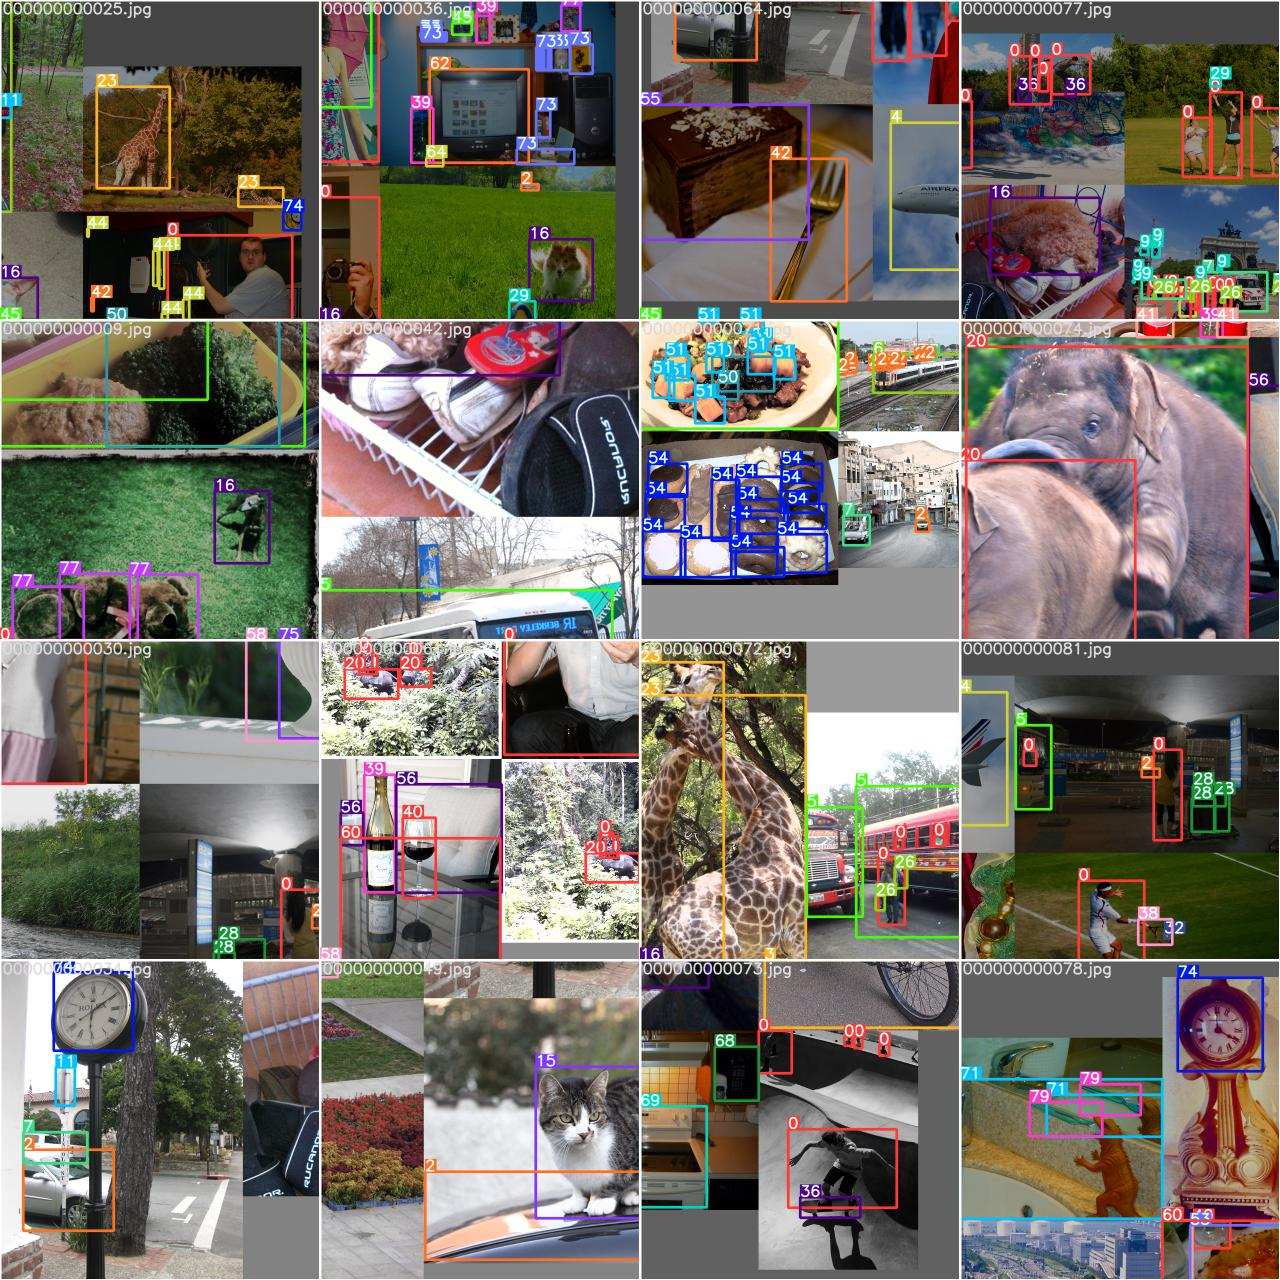

In [ ]:
Image(filename='runs/train/tutorial/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels

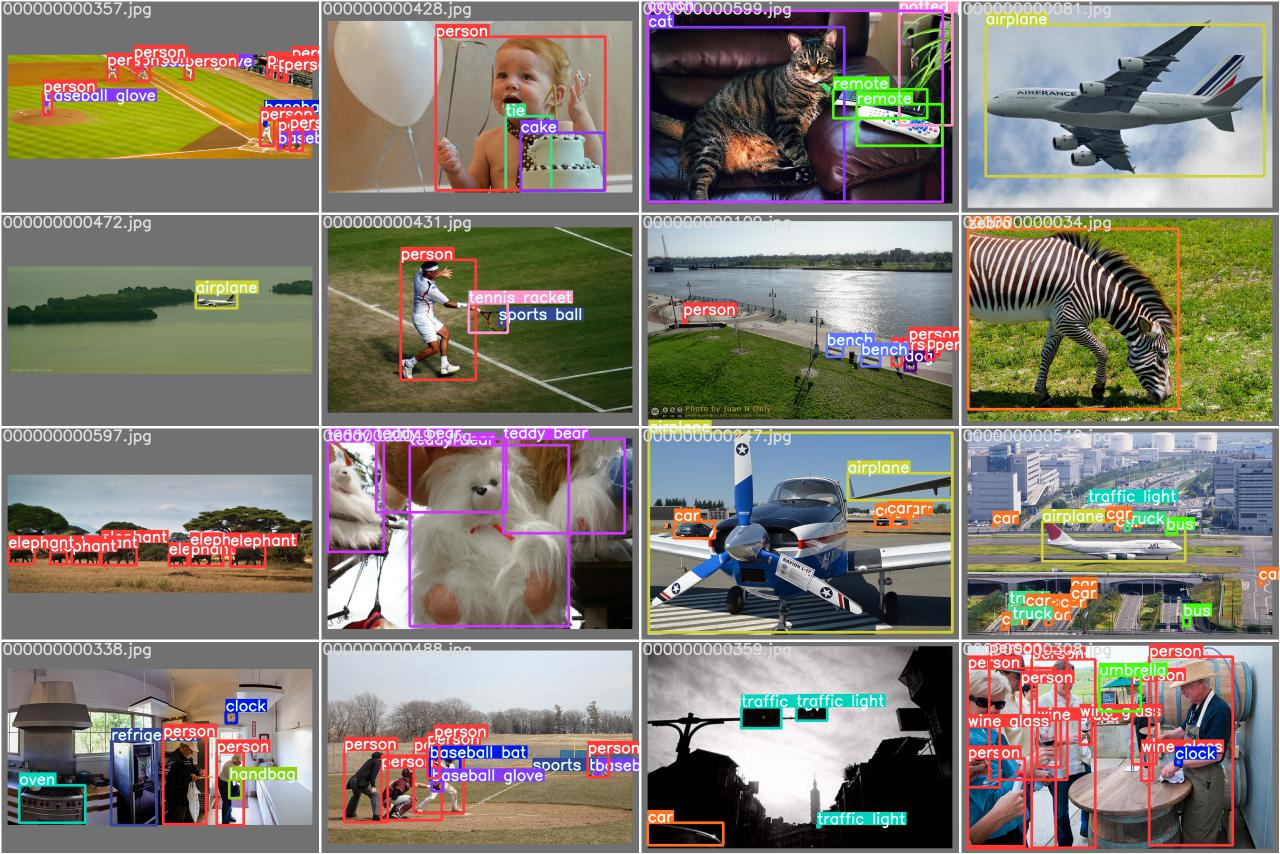

In [ ]:
Image(filename='runs/train/tutorial/test_batch0_labels.jpg', width=800)  # test batch 0 labels

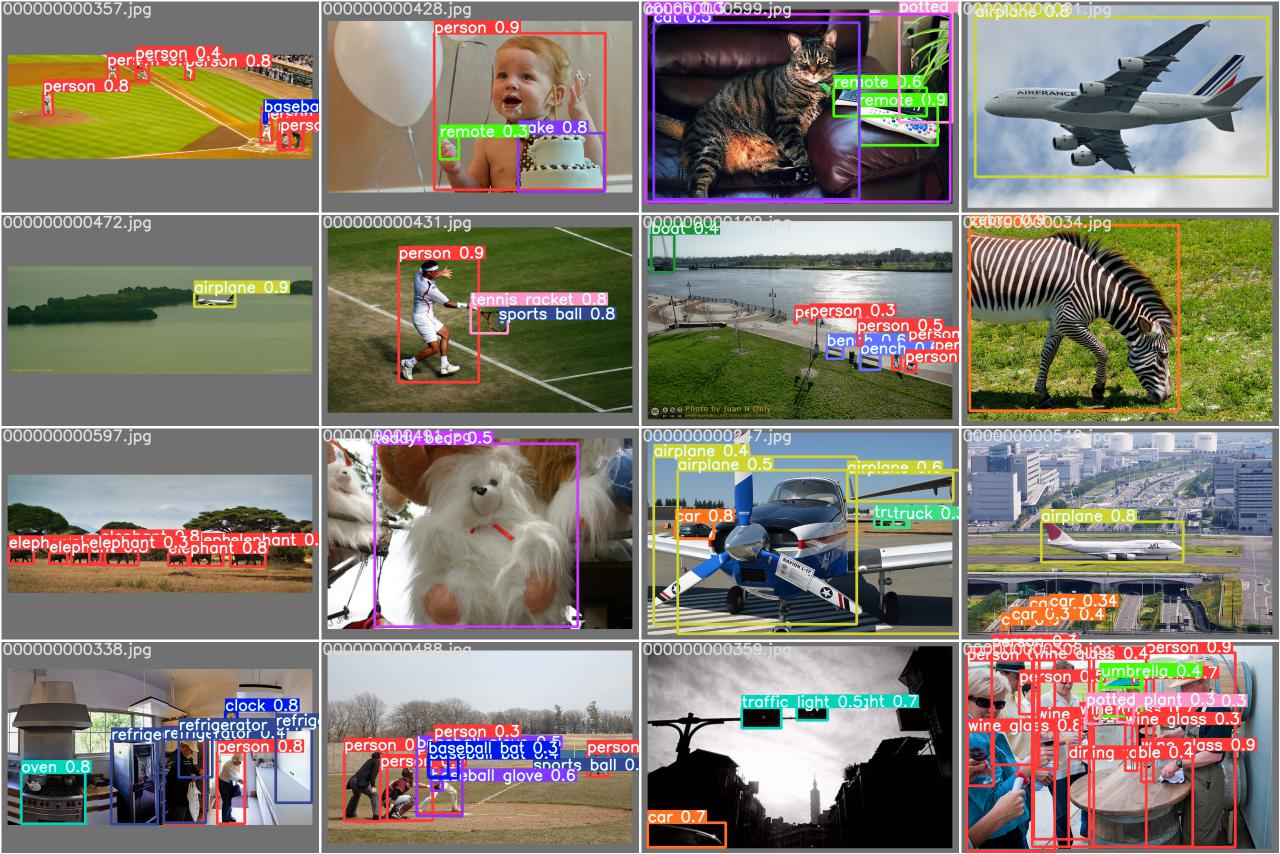

In [ ]:
Image(filename='runs/train/tutorial/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

In [ ]:
!ls ../coco128/images/train2017

000000000009.jpg  000000000154.jpg  000000000370.jpg  000000000529.jpg
000000000025.jpg  000000000164.jpg  000000000382.jpg  000000000531.jpg
000000000030.jpg  000000000165.jpg  000000000384.jpg  000000000532.jpg
000000000034.jpg  000000000192.jpg  000000000387.jpg  000000000536.jpg
000000000036.jpg  000000000194.jpg  000000000389.jpg  000000000540.jpg
000000000042.jpg  000000000196.jpg  000000000394.jpg  000000000542.jpg
000000000049.jpg  000000000201.jpg  000000000395.jpg  000000000544.jpg
000000000061.jpg  000000000208.jpg  000000000397.jpg  000000000560.jpg
000000000064.jpg  000000000241.jpg  000000000400.jpg  000000000562.jpg
000000000071.jpg  000000000247.jpg  000000000404.jpg  000000000564.jpg
000000000072.jpg  000000000250.jpg  000000000415.jpg  000000000569.jpg
000000000073.jpg  000000000257.jpg  000000000419.jpg  000000000572.jpg
000000000074.jpg  000000000260.jpg  000000000428.jpg  000000000575.jpg
000000000077.jpg  000000000263.jpg  000000000431.jpg  000000000581.jpg
000000

In [ ]:
!python detect.py --weights runs/train/tutorial/weights/best.pt --img 416 --conf 0.4 --source ../coco128/images/train2017/*360.jpg


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=416, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='../coco128/images/train2017/000000000360.jpg', update=False, view_img=False, weights=['runs/train/tutorial/weights/best.pt'])
YOLOv5 🚀 2021-6-12 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPs
image 1/1 /content/drive/MyDrive/Colab Notebooks/yolo_train/yolov5/../coco128/images/train2017/000000000360.jpg: 320x416 1 person, Done. (0.010s)
Results saved to runs/detect/exp2
Done. (0.028s)


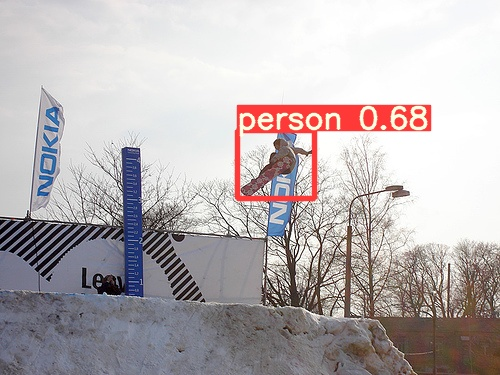

In [ ]:
Image(filename='runs/detect/exp2/000000000360.jpg', width=600)

In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks/yolo_train/yolov5


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=416, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=True, source='./data/images/', update=False, view_img=False, weights=['yolov5s.pt'])
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /content/drive/My Drive/Colab Notebooks/yolo_train/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2021-6-12 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserW

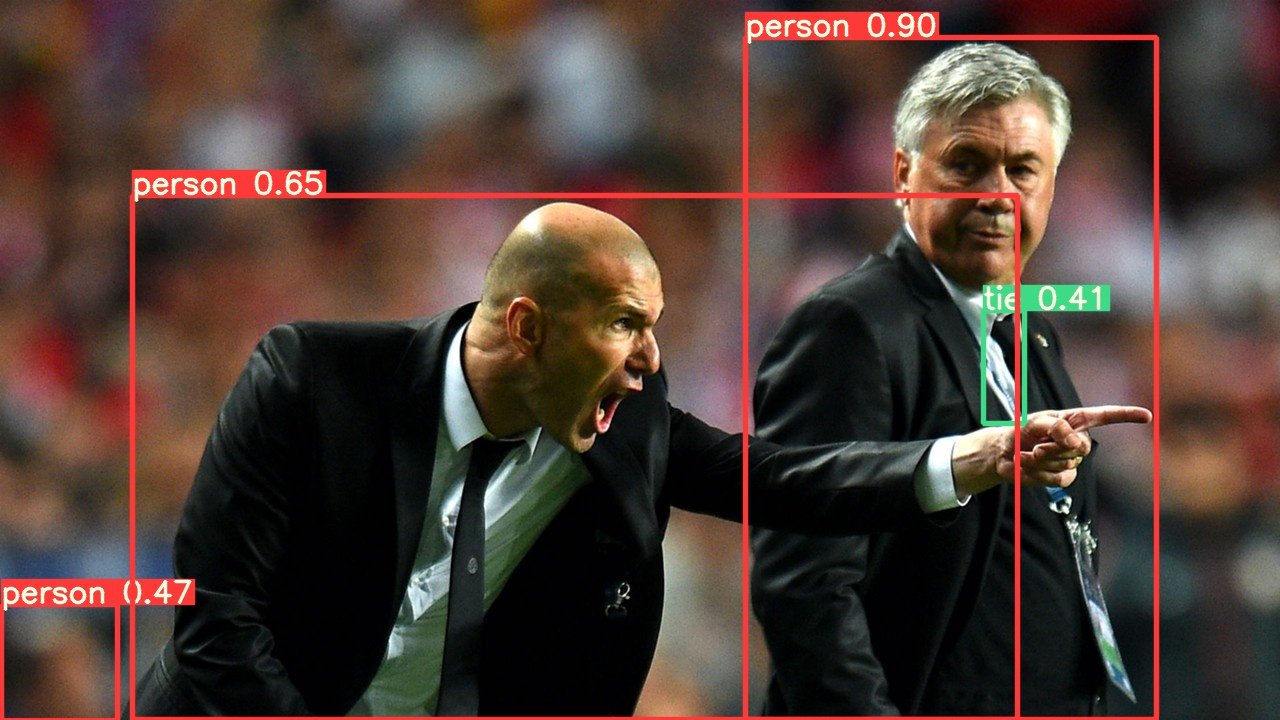

In [ ]:
!cd ..

In [ ]:
!ls

# 2. Raccoon Dataset で学習してみる

In [ ]:
# Download Raccoon dataset from roboflow
torch.hub.download_url_to_file('https://public.roboflow.com/ds/zGFp9TAQX3?key=EvlxKipQYj', 'tmp.zip')
!unzip -q tmp.zip -d ../raccoon/ && rm tmp.zip

In [ ]:
# Train YOLOv5s on Raccoon for 200 epochs
!python train.py --img 640 --batch 16 --epochs 200 --data ../raccoon/data.yaml --cfg ./models/yolov5s.yaml --weights "" --name raccoon --nosave --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 2021-6-12 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='../raccoon/data.yaml', device='', entity=None, epochs=200, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='raccoon', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/raccoon', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-06-12 04:03:47.138464: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successful

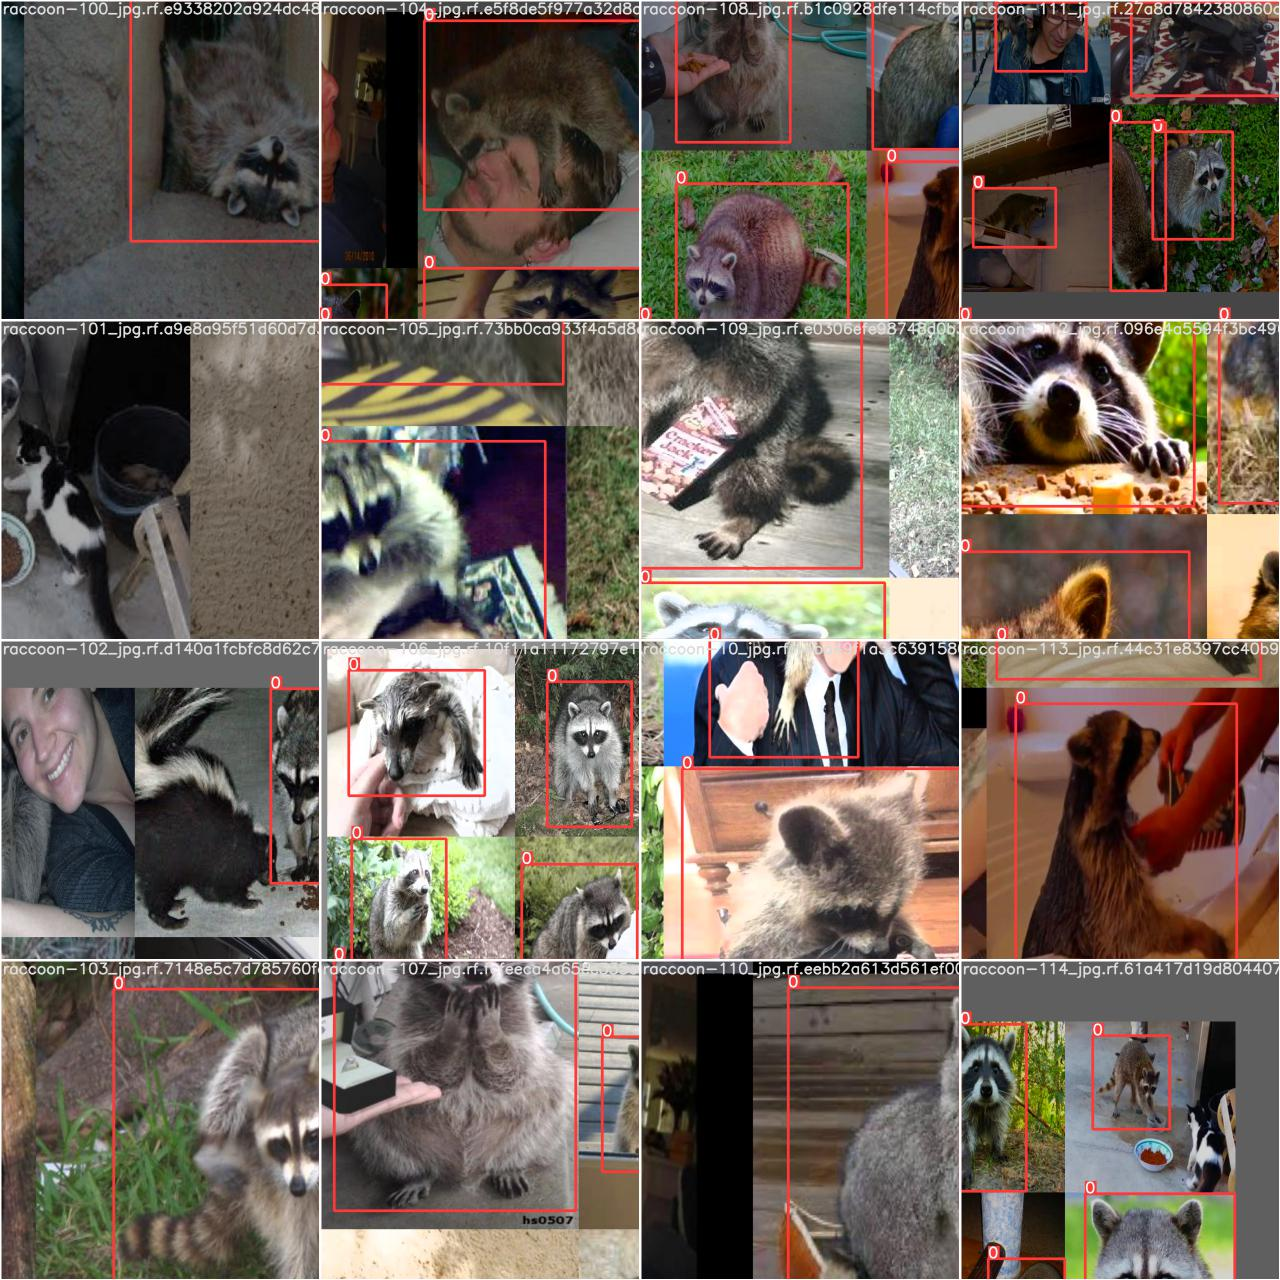

In [ ]:
Image(filename='runs/train/exp8/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels

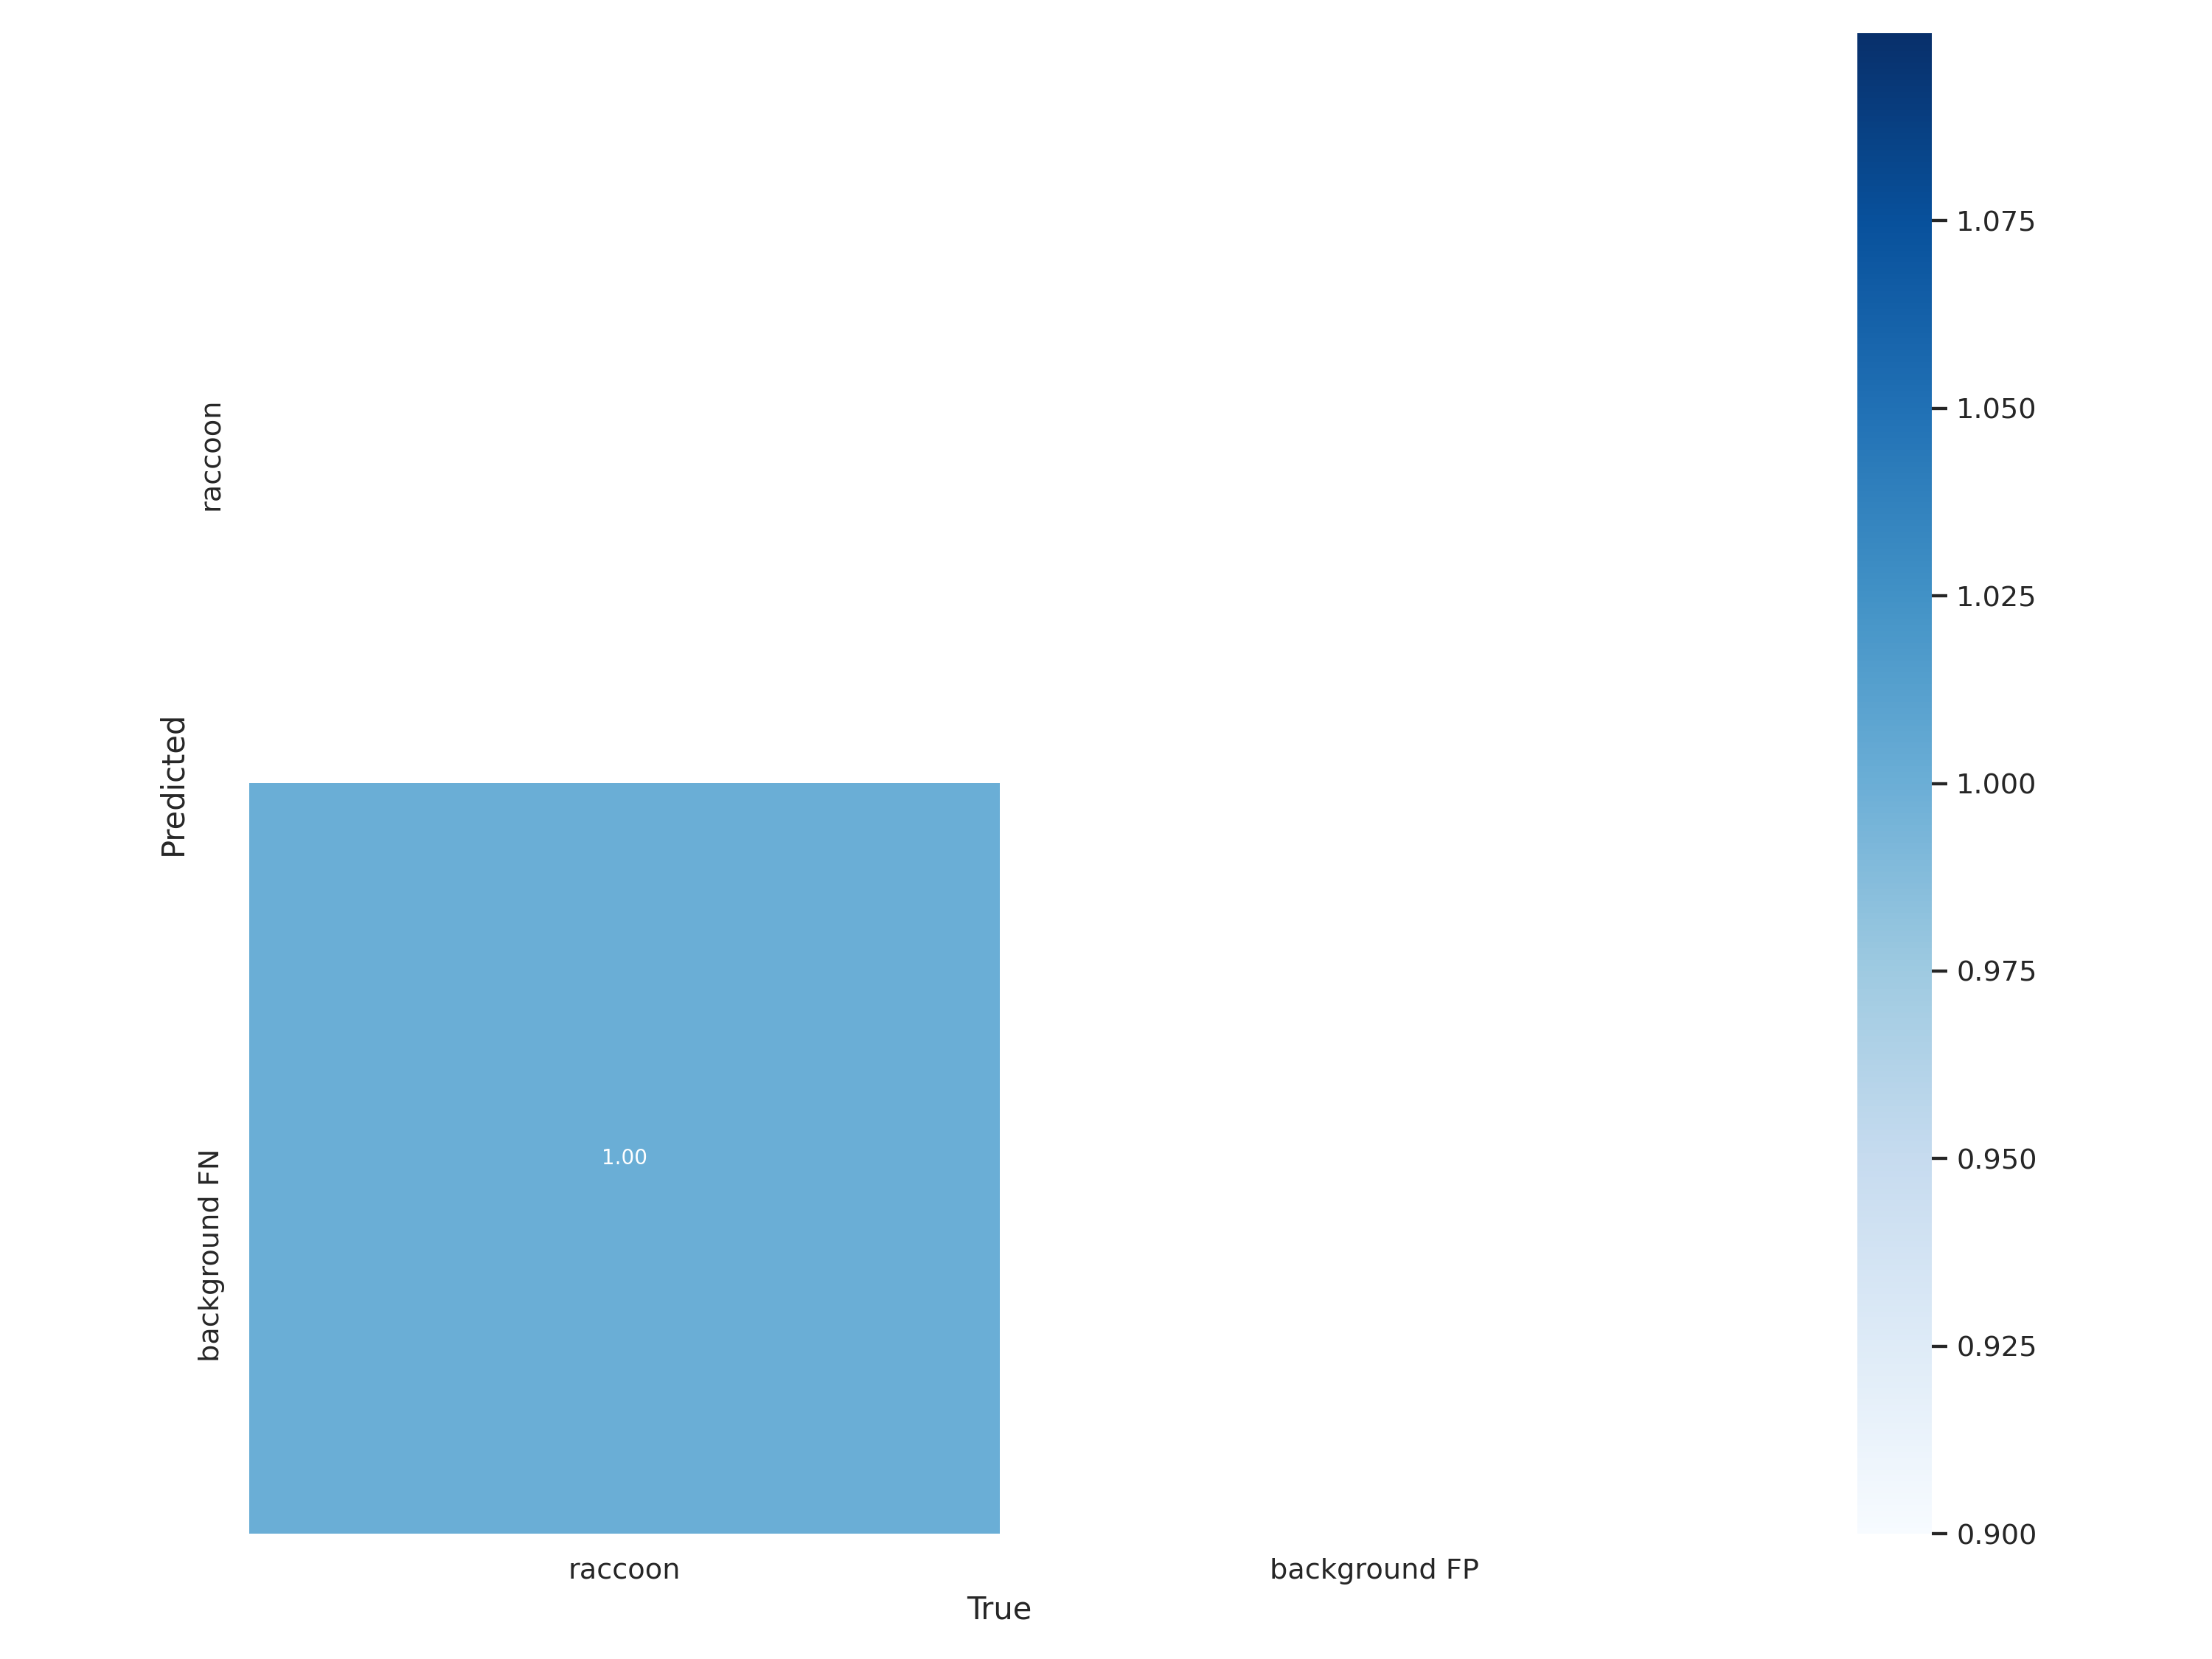

In [ ]:
Image(filename='runs/train/exp8/confusion_matrix.png', width=800)  # train batch 0 mosaics and labels

In [ ]:
!python detect.py --weights runs/train/raccoon/weights/last.pt --source ../test_rac.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='../test_rac.jpg', update=False, view_img=False, weights=['runs/train/raccoon/weights/last.pt'])
YOLOv5 🚀 2021-6-12 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients
image 1/1 /content/drive/My Drive/Colab Notebooks/yolo_train/yolov5/../test_rac.jpg: 640x640 Done. (0.015s)
Results saved to runs/detect/exp24
Done. (0.184s)


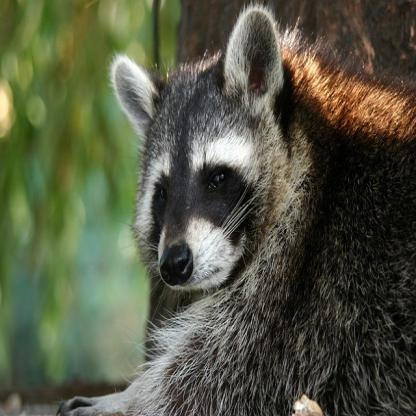

In [ ]:
Image(filename='runs/detect/exp11/test_rac.jpg', width=800)  # train batch 0 mosaics and labels

こちらは200200エポックで学習してもダメだった。。。。

# 3.Inagi Dataset

・データ数が少ない（500）の時は、エポック数を多く300程度とする。
この学習では、1時間ぐらいかかった。

In [ ]:
torch.hub.download_url_to_file('https://public.roboflow.com/ds/0m4fp1DPss?key=3mOhruPPbN', 'tmp.zip')
!unzip -q tmp.zip -d ../dice/ && rm tmp.zip


replace ../dice/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ../dice/README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ../dice/data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ../dice/export/images/0BrzNN9qMnzQlQPZ1sso.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# Train YOLOv5s on dice for 10 epochs
!python train.py --img 480 --batch 16 --epochs 20 --data ../inagi/data.yaml --cfg ./models/yolov5s.yaml --weights "" --name dice --nosave --cache

github: ⚠️ WARNING: code is out of date by 125 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 2021-6-12 torch 1.9.0+cu102 CUDA:0 (Tesla P4, 7611.9375MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='../inagi/data.yaml', device='', entity=None, epochs=20, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[480, 480], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='dice', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/dice36', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-07-23 14:54:2

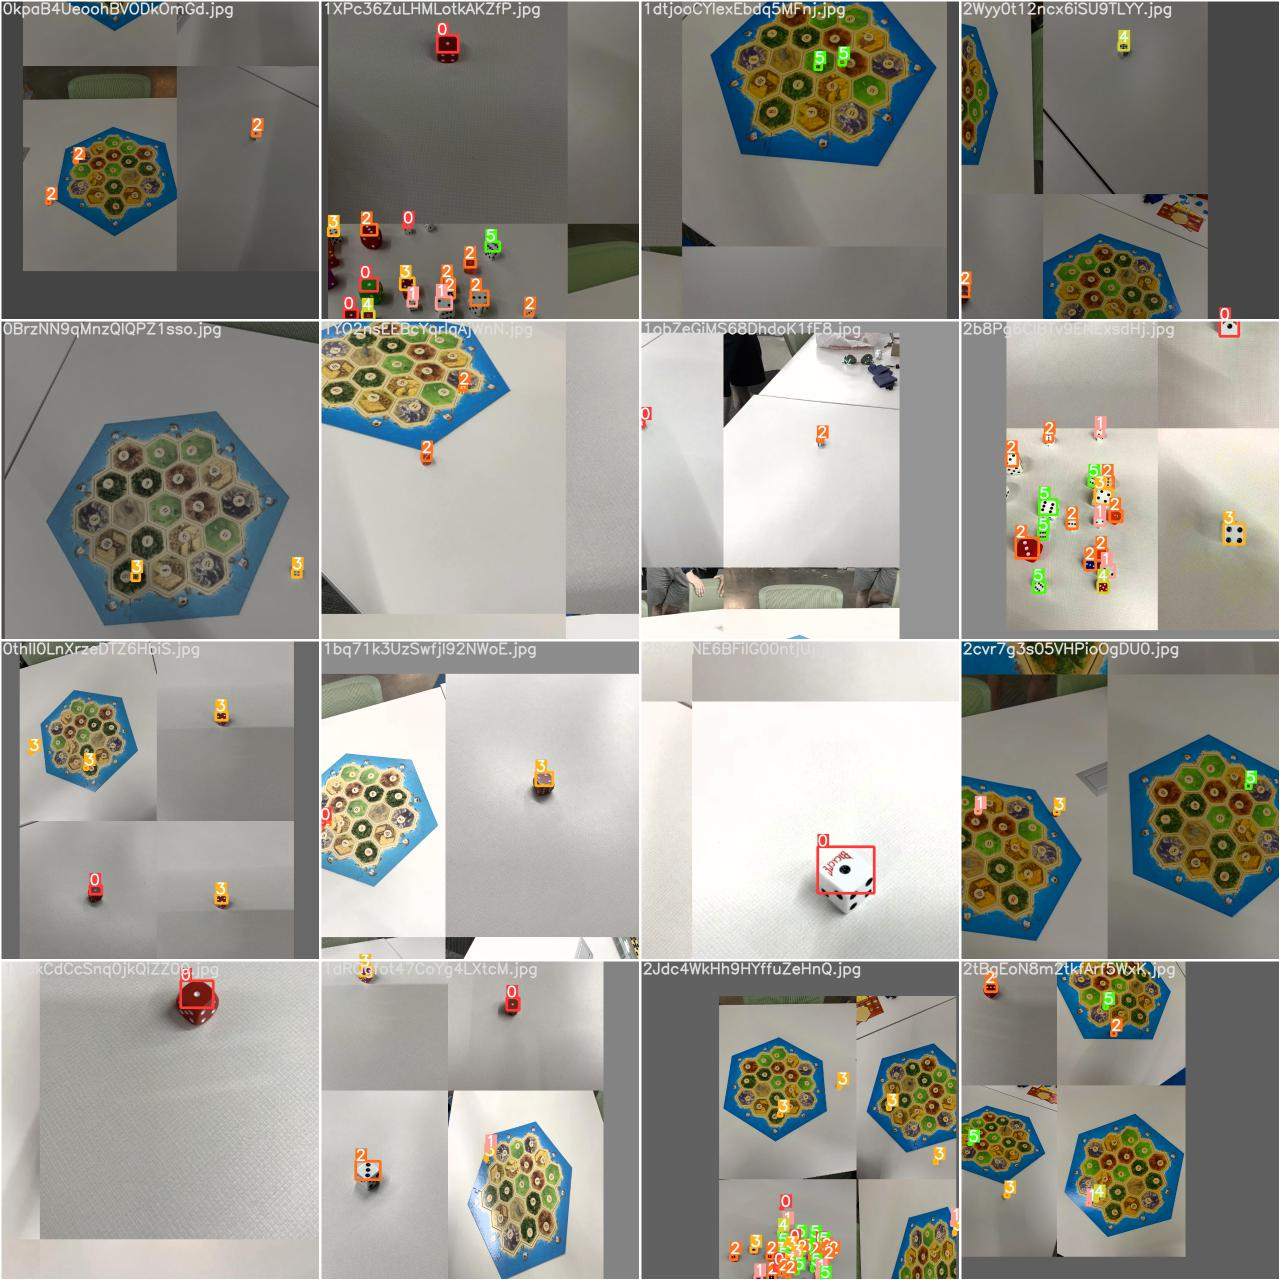

In [ ]:
Image(filename='runs/train/dice3/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels

In [ ]:
!python detect.py --weights runs/train/dice3/weights/last.pt --source ../dice/dice.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='../dice/dice.jpg', update=False, view_img=False, weights=['runs/train/dice3/weights/last.pt'])
YOLOv5 🚀 2021-6-12 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7067395 parameters, 0 gradients
image 1/1 /content/drive/My Drive/Colab Notebooks/yolo_train/yolov5/../dice/dice.jpg: 640x480 1 4, 1 6, Done. (0.013s)
Results saved to runs/detect/exp23
Done. (0.047s)


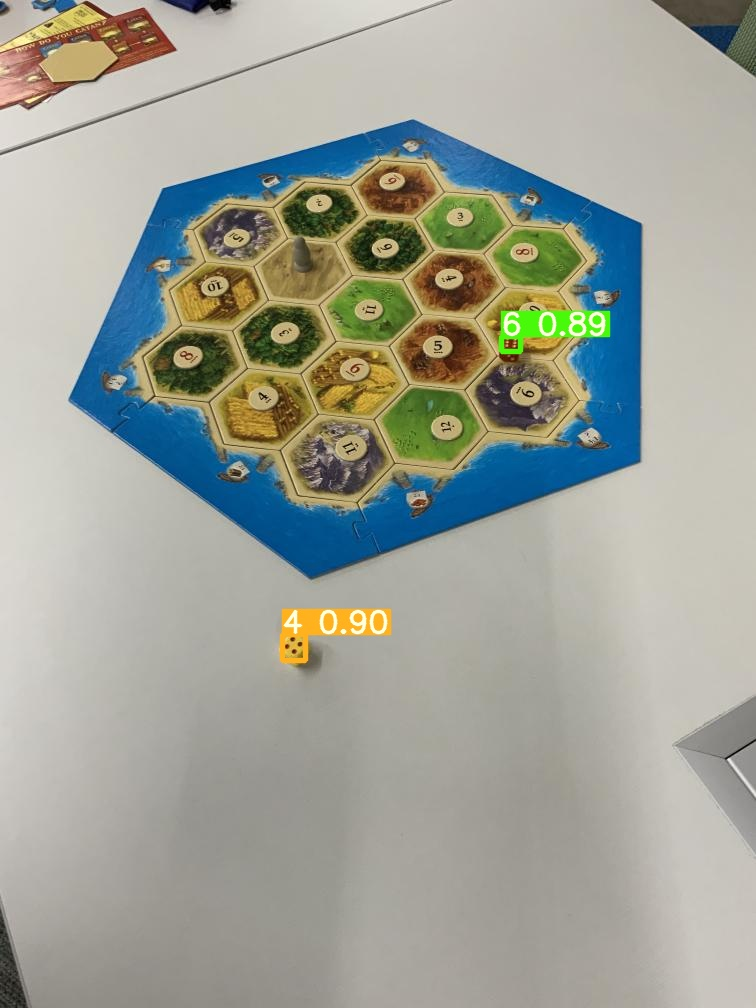

In [ ]:
Image(filename='runs/detect/exp23/dice.jpg', width=800)  # train batch 0 mosaics and labels

できた！！！

# 4. Hard Hat Dataset

[**roboflow**](https://public.roboflow.com/object-detection/hard-hat-workers/1) からDataset取得

In [ ]:
torch.hub.download_url_to_file('https://public.roboflow.com/ds/iUFyPAqxI6?key=wF5CEZ5M4t', 'tmp.zip')
!unzip -q tmp.zip -d ../hat/ && rm tmp.zip

In [ ]:
# Train YOLOv5s on dice for 10 epochs
!python train.py --img 416 --batch 16 --epochs 20 --data ../hat/data.yaml --cfg ./models/yolov5s.yaml --weights "" --name hat --nosave --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 2021-6-12 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='../hat/data.yaml', device='', entity=None, epochs=20, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='hat', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/hat4', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-06-12 04:37:26.352621: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dy

In [ ]:
!python detect.py --weights runs/train/hat4/weights/best.pt --source ../hat/hat.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='../hat/hat.jpg', update=False, view_img=False, weights=['runs/train/hat4/weights/best.pt'])
YOLOv5 🚀 2021-6-12 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients
image 1/1 /content/drive/My Drive/Colab Notebooks/yolo_train/yolov5/../hat/hat.jpg: 640x640 2 helmets, Done. (0.016s)
Results saved to runs/detect/exp25
Done. (0.358s)


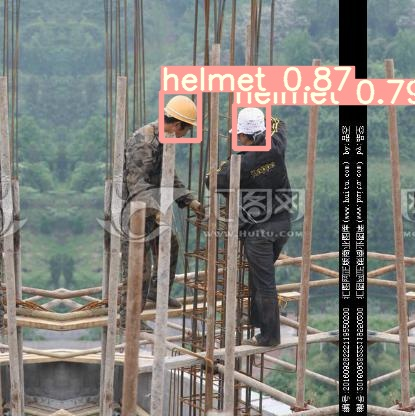

In [ ]:
Image(filename='runs/detect/exp25/hat.jpg', width=800)  

こちらもできた！！！

# 5. 自前のデータセットで学習してみる

## 5.1 学習用データ準備

Pokemon_car, Buggy, F1の玩具の車の写真を各60～70枚、合計206枚準備。各写真には、それぞれの車が1台ずつ写っている。撮影角度を変えたり、背景を変えたりとそれぞれの写真が異なるように工夫した。


[labelImg](https://github.com/tzutalin/labelImg)を使って、すべての写真にラベル付け（YOLO形式）。写真を./car/imagesフォルダへ、ラベルテキストファイルを./car/labelsフォルダへまとめる。

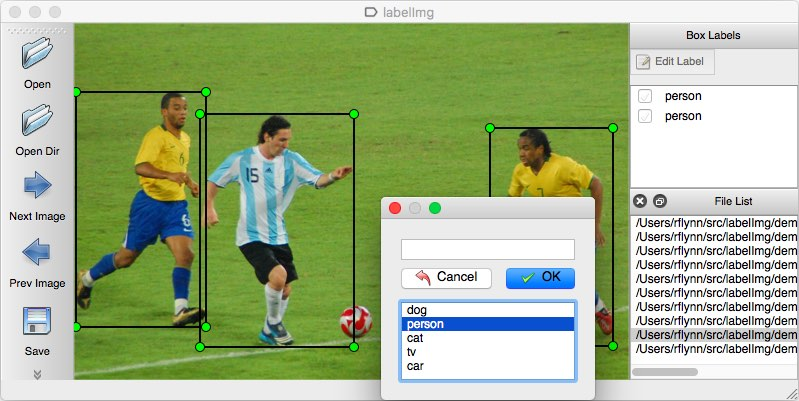

data.yamlファイルの内容を少し書き換え

## 5.2 学習

In [ ]:
# Train YOLOv5s on dice for 10 epochs
!python train.py --batch 16 --epochs 210 --data ../car/data.yaml --cfg ./models/yolov5s.yaml --weights "" --name car --nosave --cache

github: ⚠️ WARNING: code is out of date by 3 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 2021-6-12 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='../car/data.yaml', device='', entity=None, epochs=210, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='car', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/car3', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-06-13 05:45:58.41629

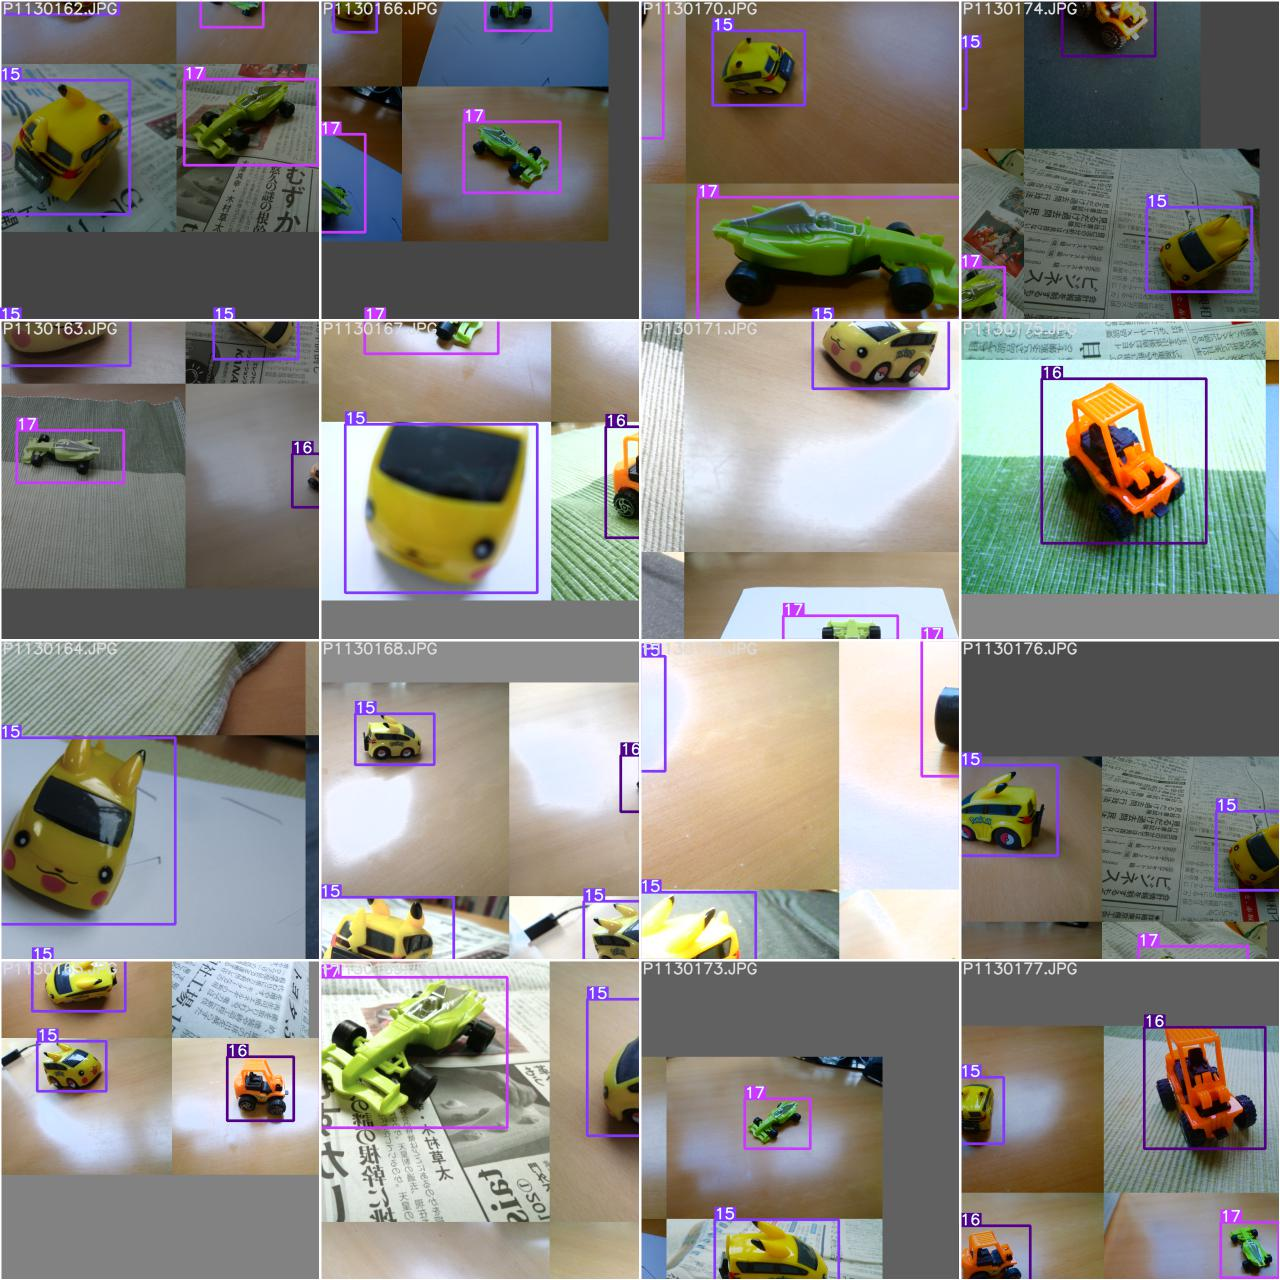

In [ ]:
Image(filename='runs/train/car2/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels

In [ ]:
!python detect.py --weights runs/train/car3/weights/last.pt --source ../car/poke.JPG

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='../car/poke.JPG', update=False, view_img=False, weights=['runs/train/car3/weights/last.pt'])
YOLOv5 🚀 2021-6-12 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7099759 parameters, 0 gradients
image 1/1 /content/drive/My Drive/Colab Notebooks/yolo_train/yolov5/../car/poke.JPG: 480x640 1 pokemon, Done. (0.046s)
Results saved to runs/detect/exp27
Done. (0.677s)


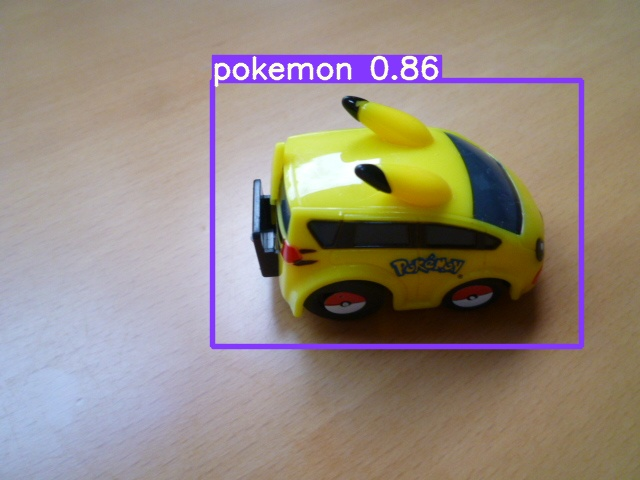

In [ ]:
Image(filename='runs/detect/exp27/poke.JPG', width=800)  # train batch 0 mosaics and labels

In [ ]:
!python detect.py --weights runs/train/car3/weights/last.pt --source ../car/car2.JPG

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='../car/car2.JPG', update=False, view_img=False, weights=['runs/train/car3/weights/last.pt'])
YOLOv5 🚀 2021-6-12 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7099759 parameters, 0 gradients
image 1/1 /content/drive/My Drive/Colab Notebooks/yolo_train/yolov5/../car/car2.JPG: 480x640 1 pokemon, Done. (0.030s)
Results saved to runs/detect/exp28
Done. (1.080s)


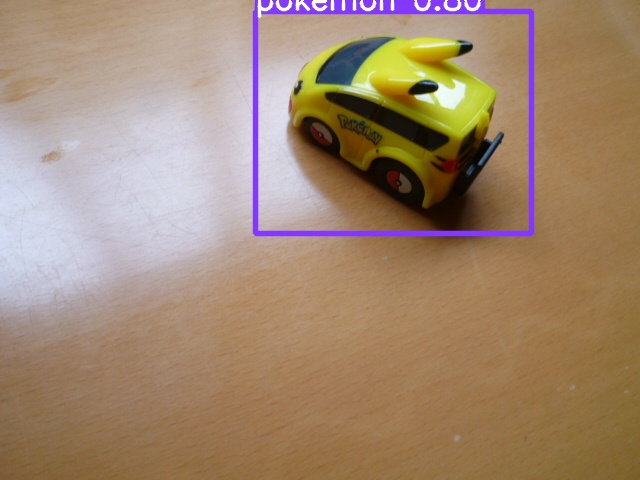

In [ ]:
Image(filename='runs/detect/exp28/car2.JPG', width=800)  # train batch 0 mosaics and labels

In [ ]:
!python detect.py --weights runs/train/car3/weights/last.pt --source ../car/car1.JPG

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='../car/car1.JPG', update=False, view_img=False, weights=['runs/train/car3/weights/last.pt'])
YOLOv5 🚀 2021-6-12 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7099759 parameters, 0 gradients
image 1/1 /content/drive/My Drive/Colab Notebooks/yolo_train/yolov5/../car/car1.JPG: 480x640 1 buggy, 1 F1, Done. (0.031s)
Results saved to runs/detect/exp29
Done. (0.614s)


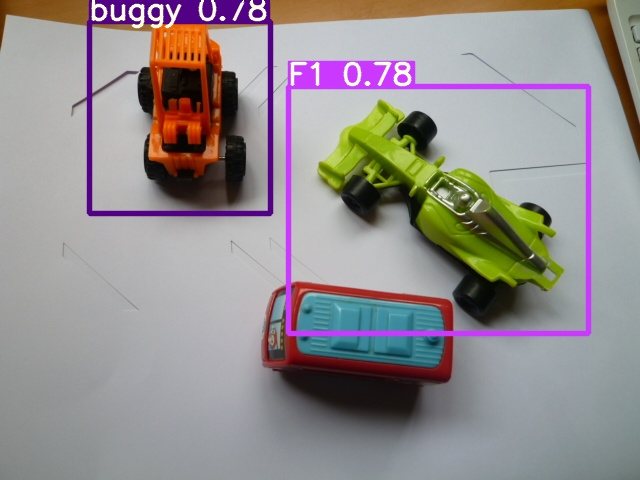

In [ ]:
Image(filename='runs/detect/exp29/car1.JPG', width=800)  # train batch 0 mosaics and labels

自前のデータでも学習できた！！！

Webcamでミニカーを取り込んだ時に物体検出できるか？やってみる。(別のPCで実施)




In [ ]:
python detect.py --weights runs/train/car3/weights/last.pt --source 0

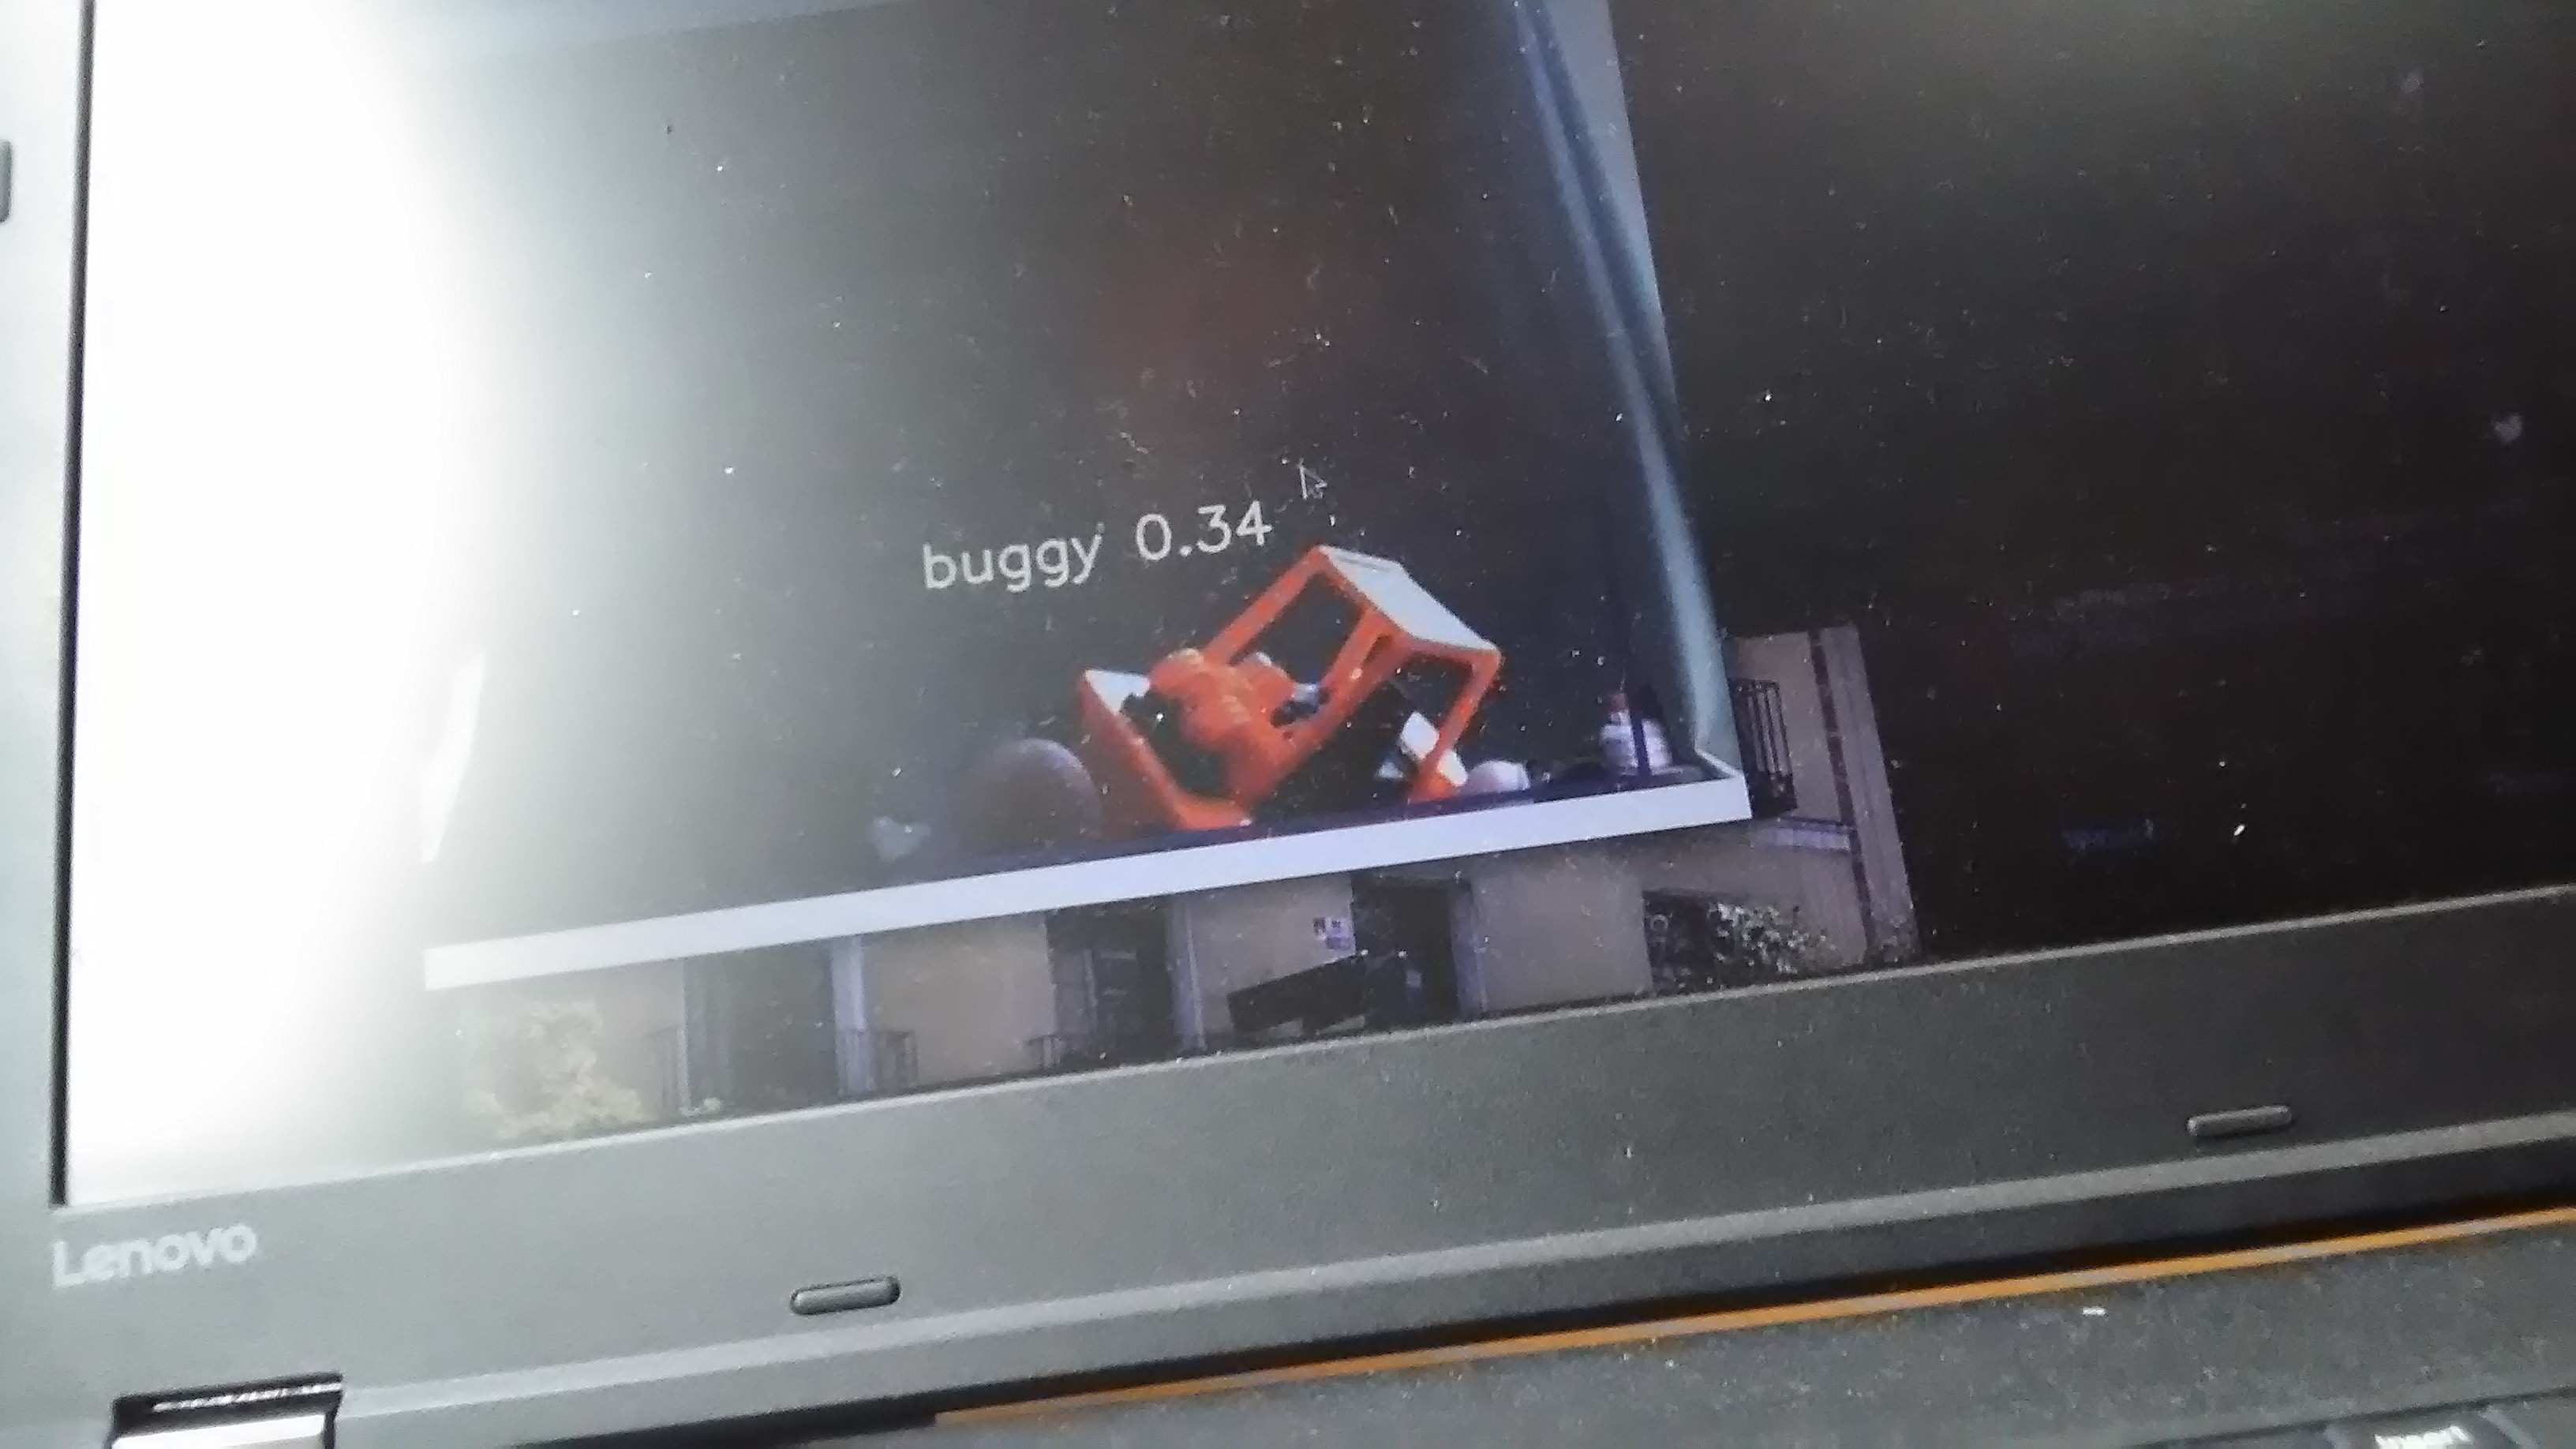

In [ ]:
Image(filename='/content/drive/My Drive/P_20210625_174713.jpg', width=600)

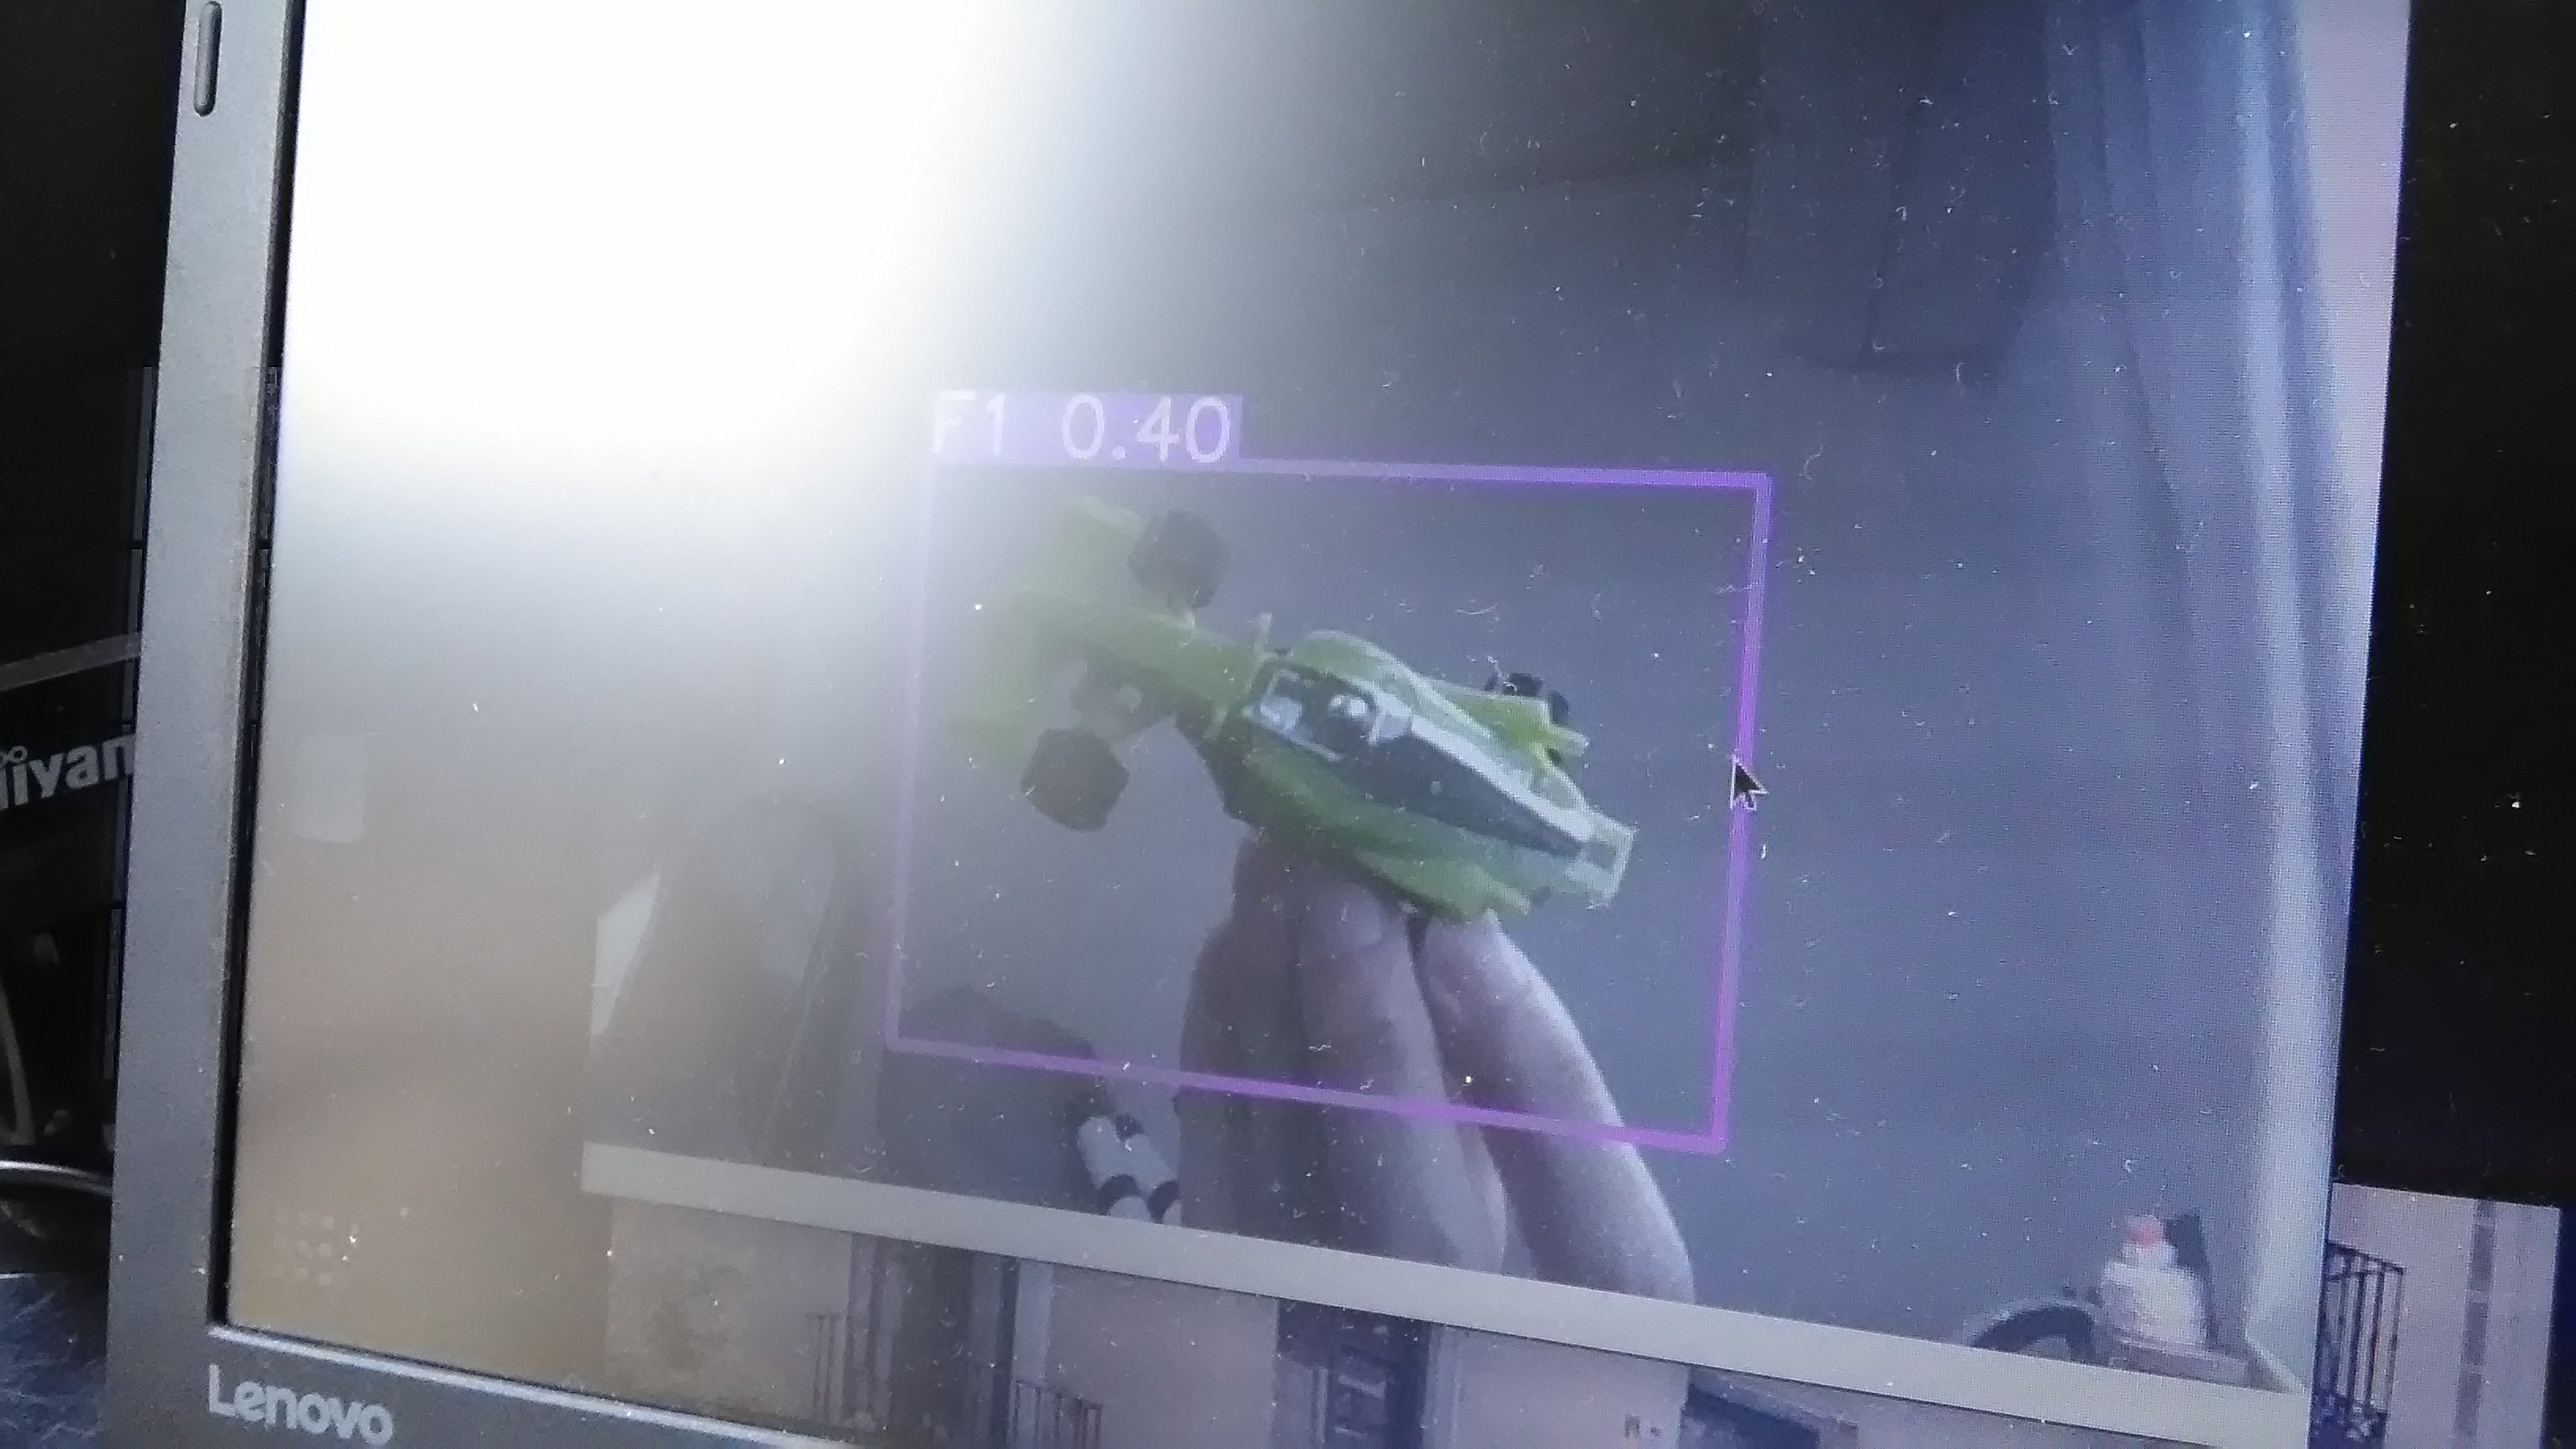

In [ ]:
Image(filename='/content/drive/My Drive/P_20210625_174758.jpg', width=600)

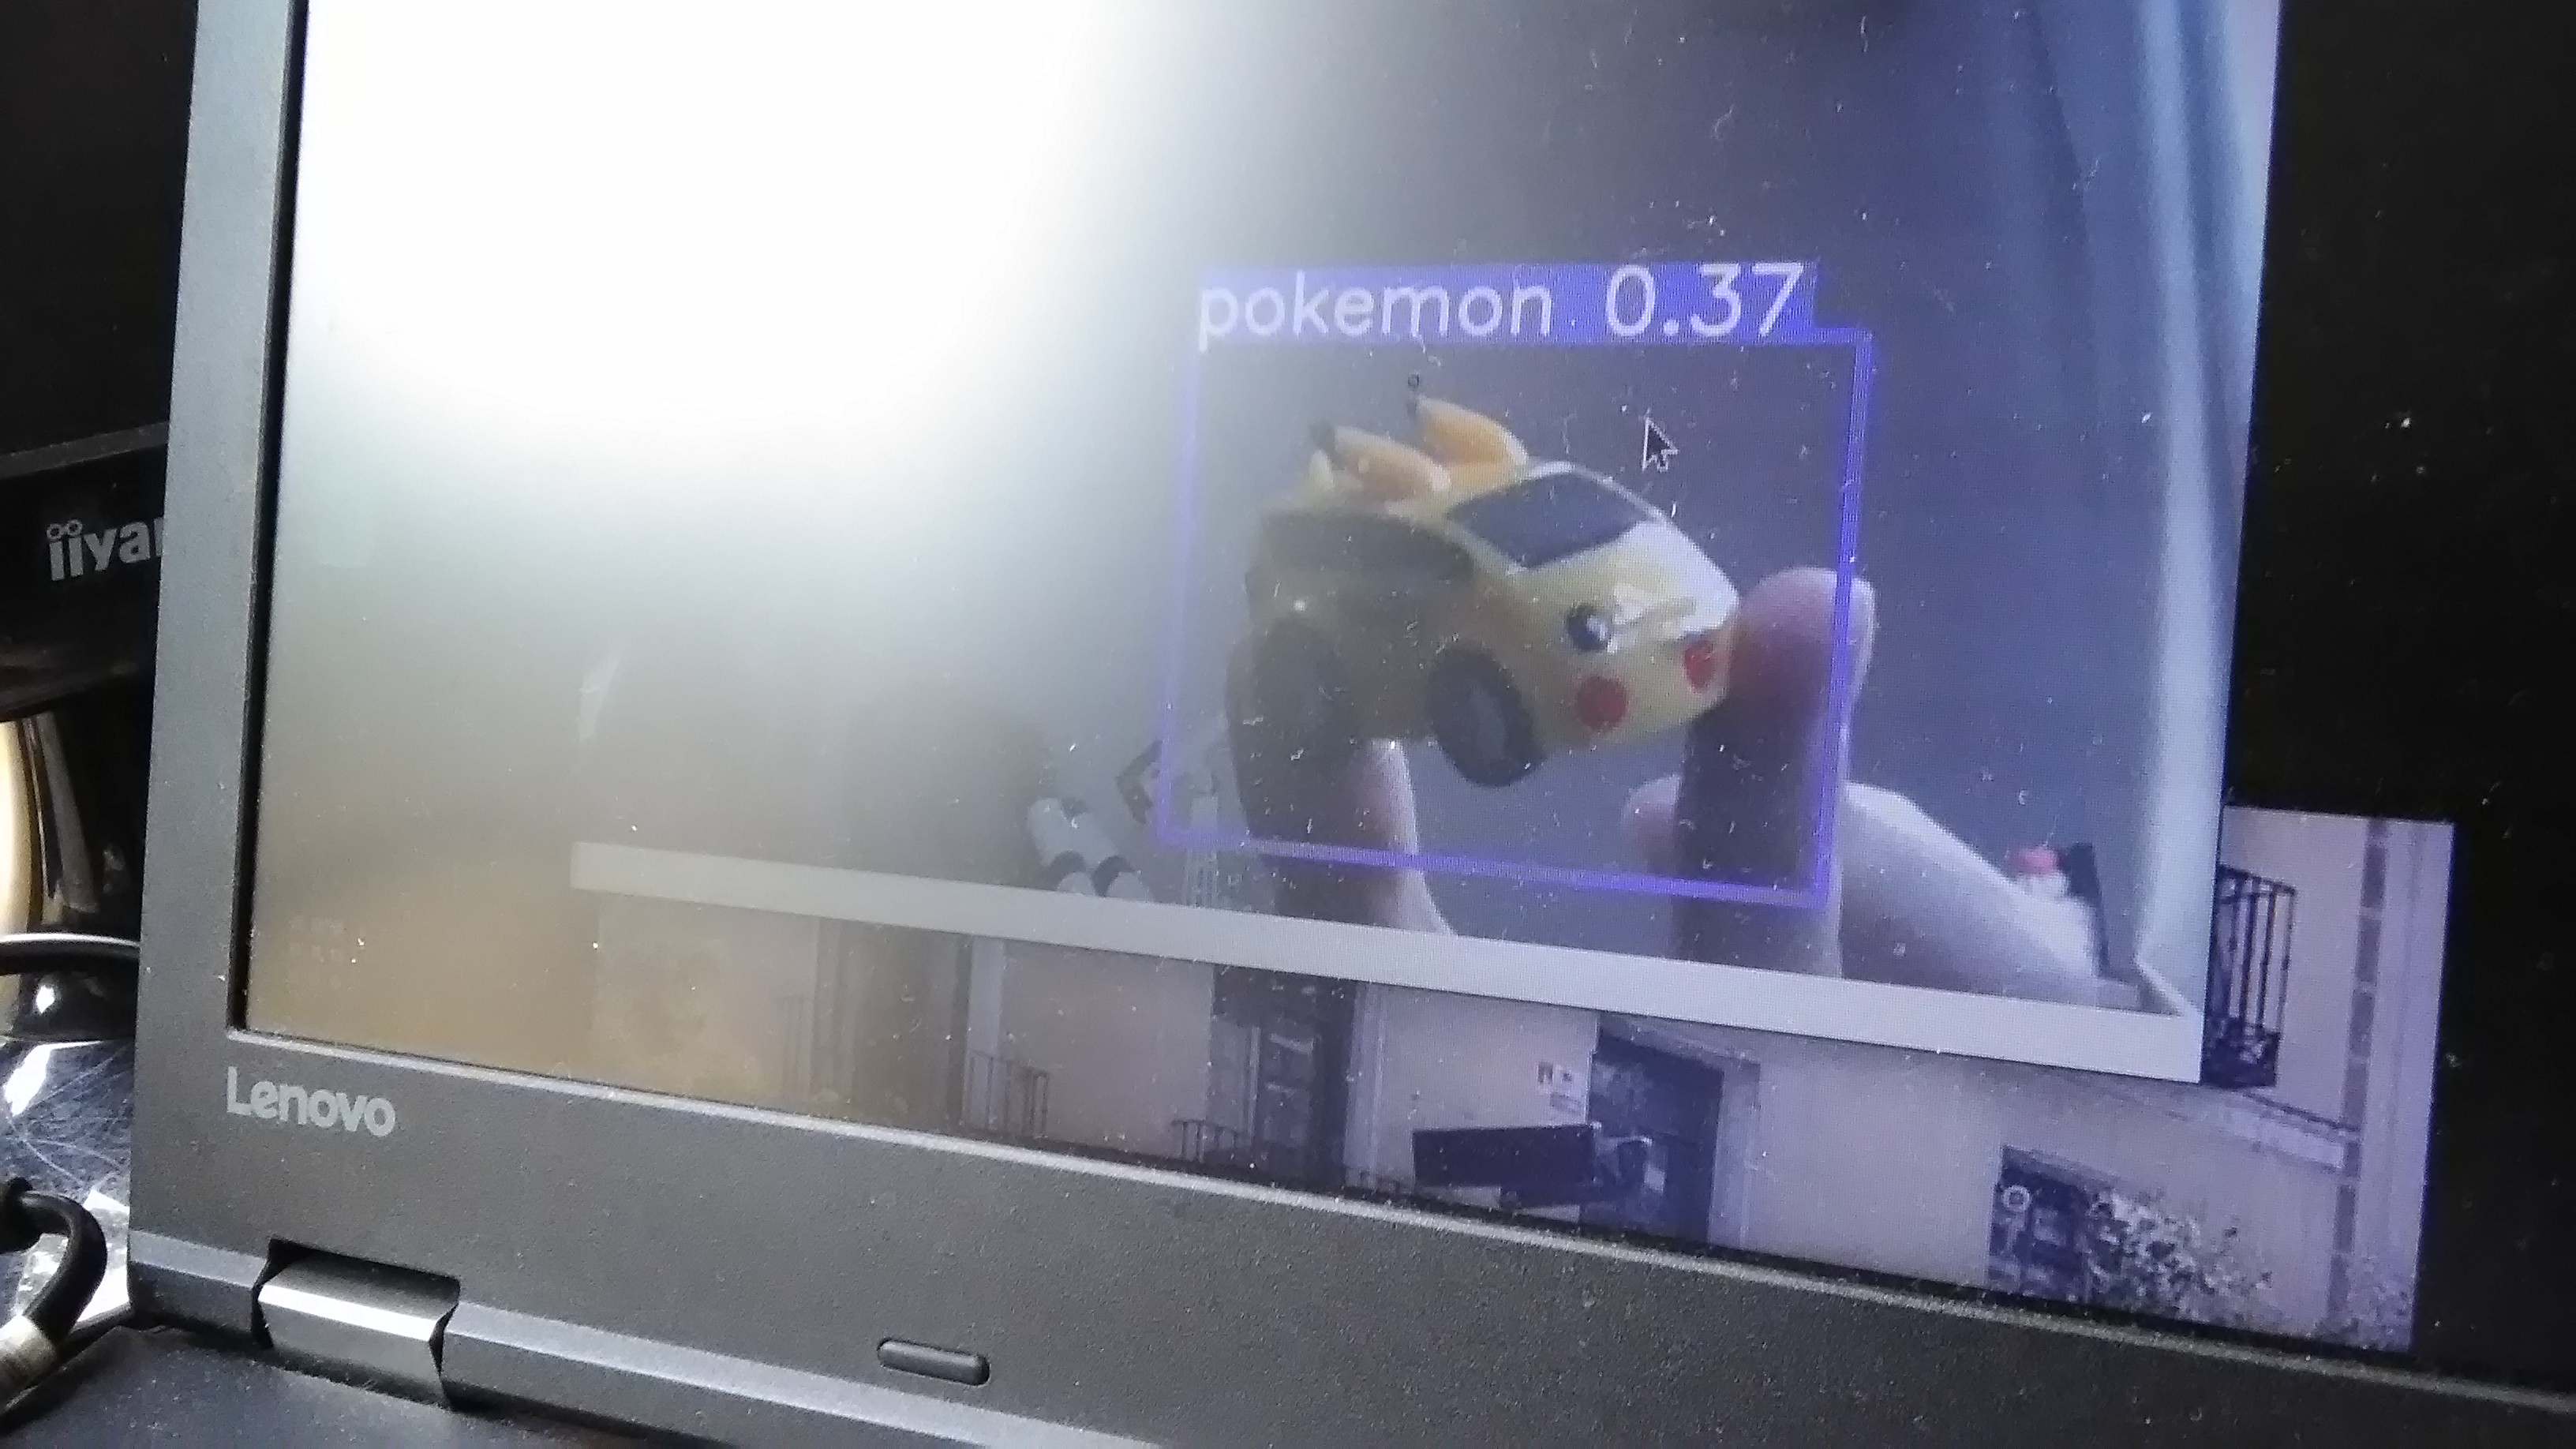

In [ ]:
Image(filename='/content/drive/My Drive/P_20210625_174829.jpg', width=600)

学習したミニカーはちゃんと検出できている！！！

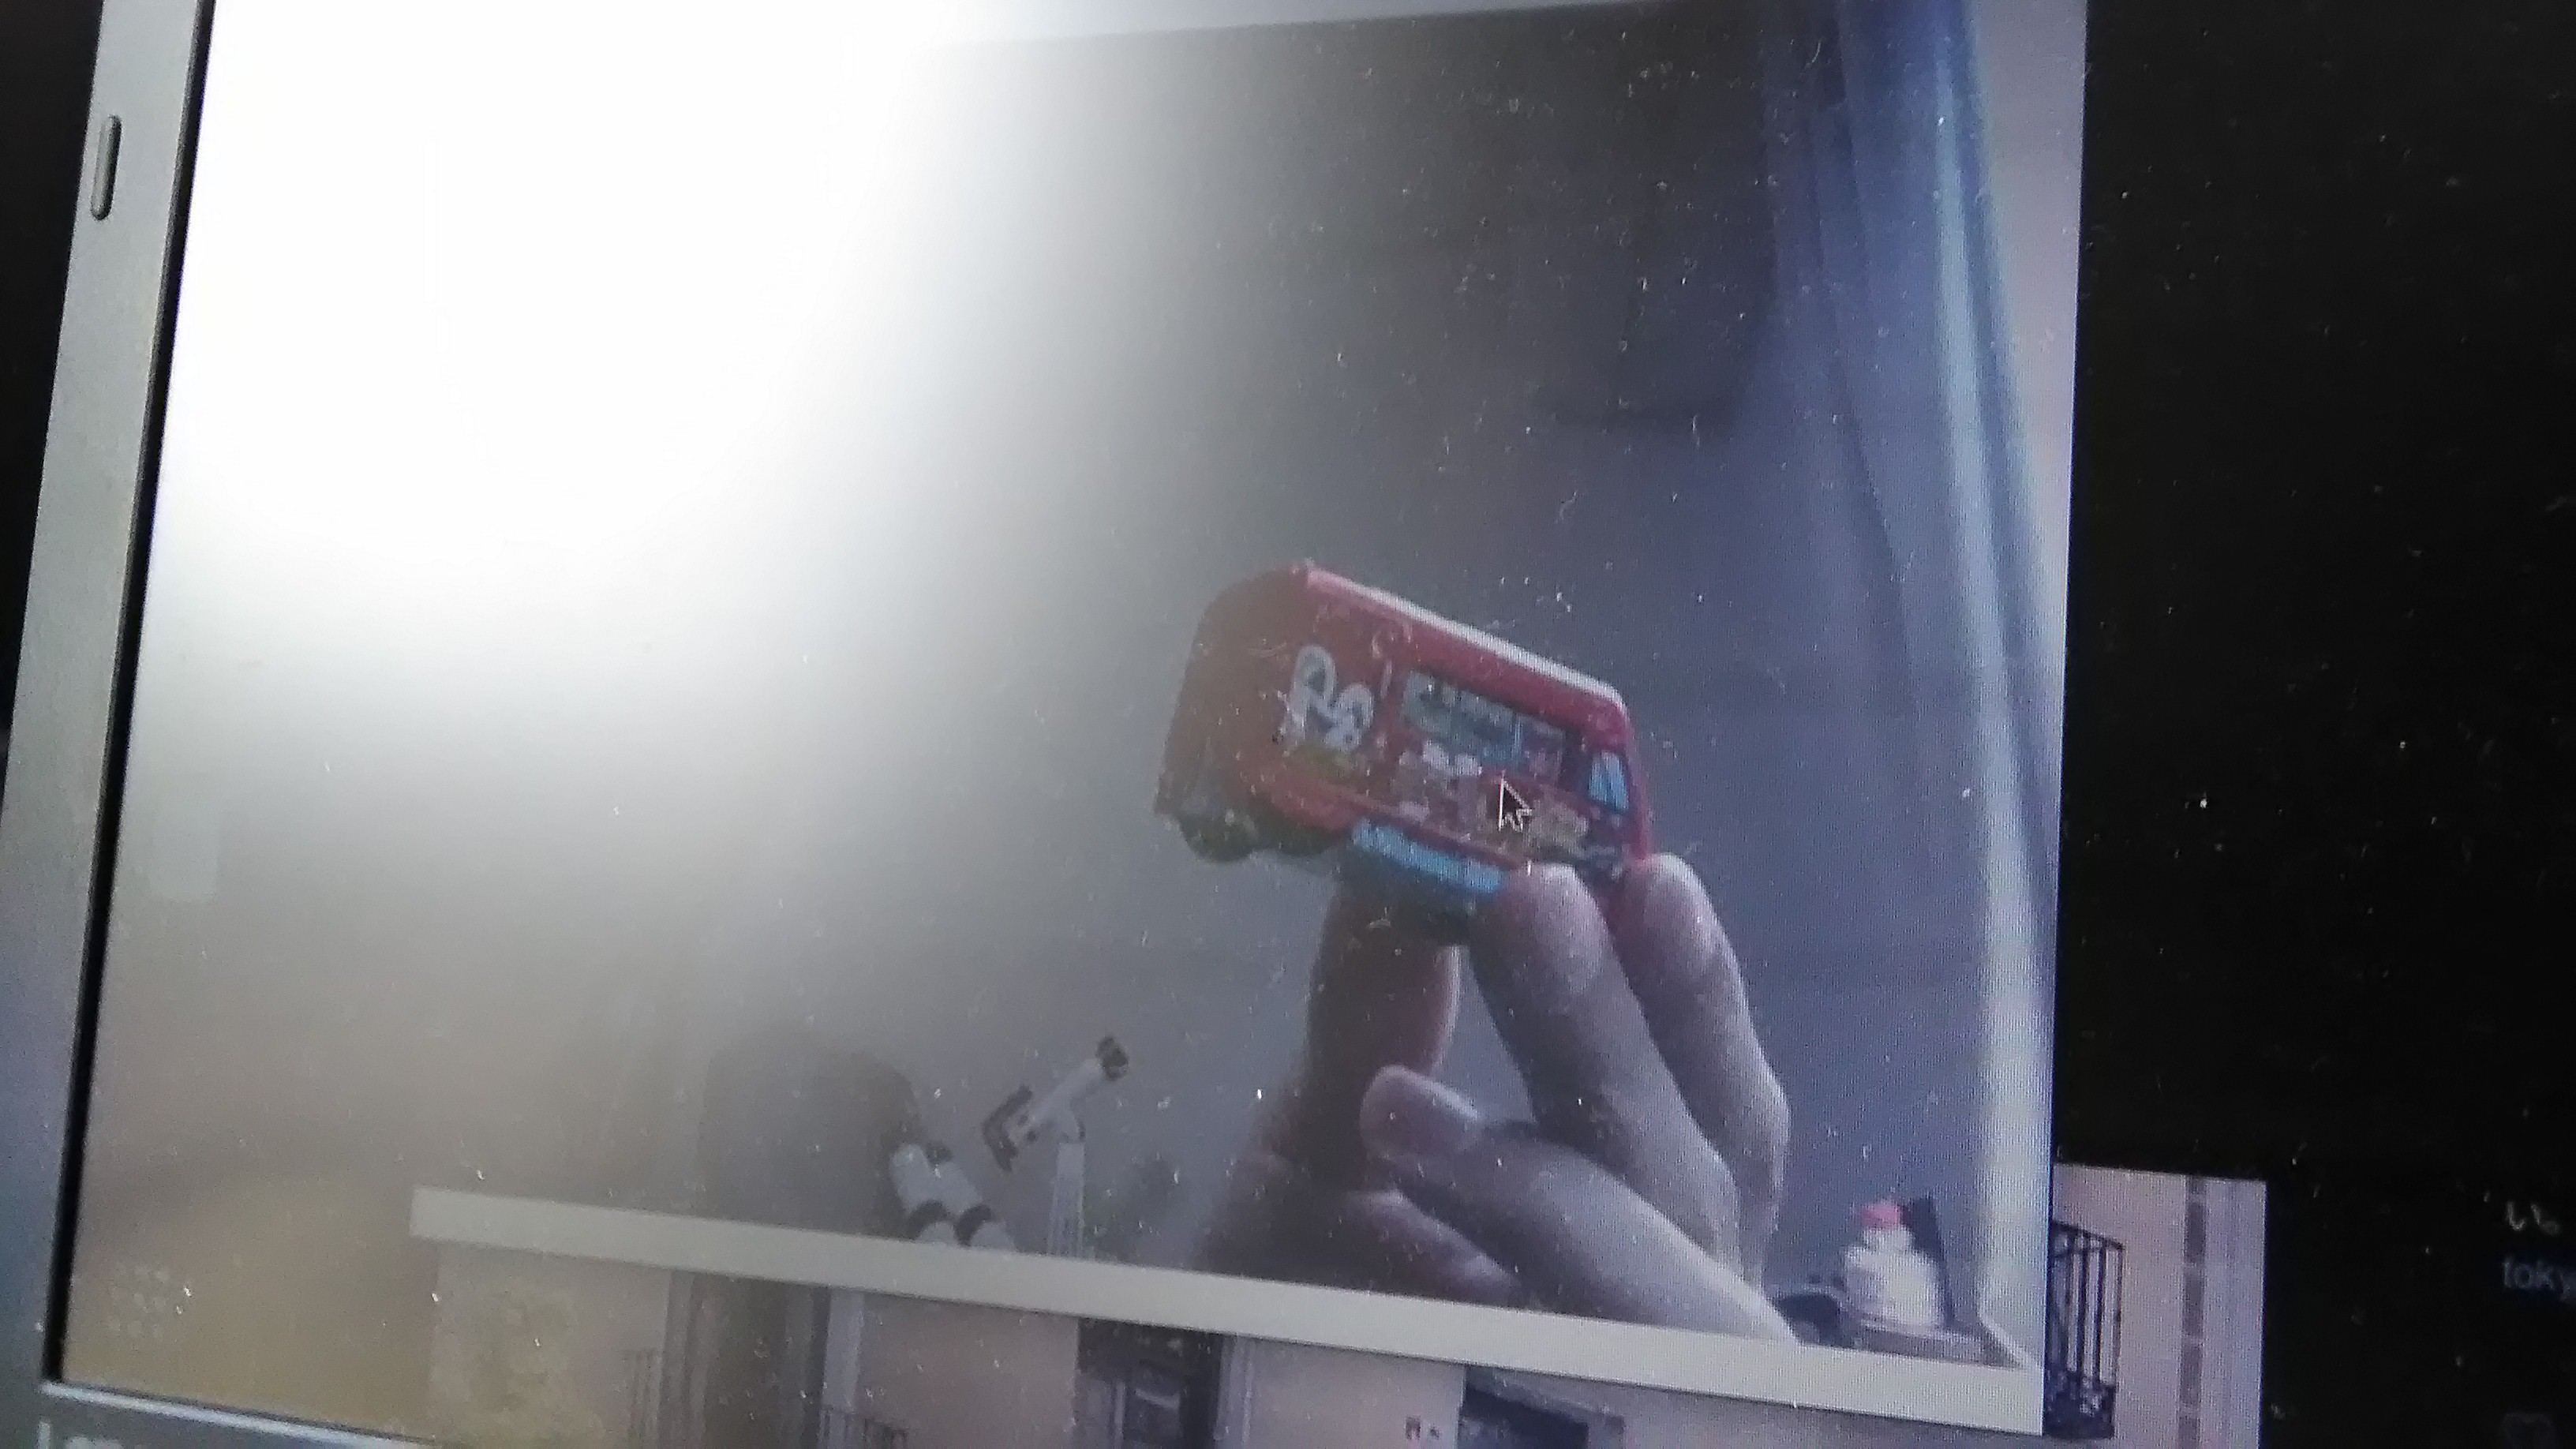

In [ ]:
Image(filename='/content/drive/My Drive/P_20210625_174855.jpg', width=600)

学習していないミニカーは認識されない！！

#いろいろ調査
## 調査１

bounding box を取得できるか？


・できる　"--save-txt" オプションを付与。\runs\detect\exp*\labels フォルダへテキスト保存

In [ ]:
!python detect.py --weights yolov5s.pt --img 416 --conf 0.4 --source ./data/images/ --save-txt 
Image(filename='runs/detect/exp/zidane.jpg', width=600)

## 調査２

[Colab Pro](https://colab.research.google.com/signup)　開発環境


 ￥1,072/月　　　
定額料金が発生 • いつでも解約可 



Colab Pro に登録すると、最速の GPU を優先的に利用できます。たとえば、登録していないユーザーに K80 が割り当てられているときでも、登録しているユーザーは T4 や P100 GPU が利用できることがあります。TPU も優先的に利用できます。ただし、Colab Pro にも使用量上限がないわけではありません。また、Colab Pro で使用可能な GPU および TPU のタイプは将来的に変更される可能性があります。

Colab の無料版では、高速な GPU と TPU へのアクセスが大幅に制限されており、使用量上限は Colab Pro よりもはるかに低くなっています。




Colab Pro を使用すると、ノートブックを最大 24 時間接続したままにでき、アイドル タイムアウトも比較的生じにくくなります。ただし、接続時間が保証されているわけではなく、アイドル タイムアウトの動作は変わる場合もあります。

Colab の無料版では、ノートブックの使用は最大 12 時間までに制限されます。アイドル タイムアウトが発生する条件も Colab Pro よりもはるかに厳密になります。
